In [0]:
%tensorflow_version 2.x

## Creación del modelo
---

In [2]:
from tensorflow.keras.datasets import boston_housing # Dataset precios de casas de Boston

(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.2, seed=10)

57344/57026 [==============================] - 0s 0us/step


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [0]:
modelo = Sequential()

In [0]:
# Agregar capa al modelo
modelo.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))

In [0]:
# Después de la primera capa no es necesario especificar la dimensión del input
modelo.add(Dense(6, kernel_initializer='normal', activation='relu'))

In [0]:
modelo.add(Dense(4, kernel_initializer='normal',activation='relu'))
modelo.add(Dense(1, kernel_initializer='normal'))

In [0]:
# Compilar el modelo
modelo.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])

In [9]:
print(modelo.summary()) # Descripción del modelo

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 299
Trainable params: 299
Non-trainable params: 0
_________________________________________________________________
None


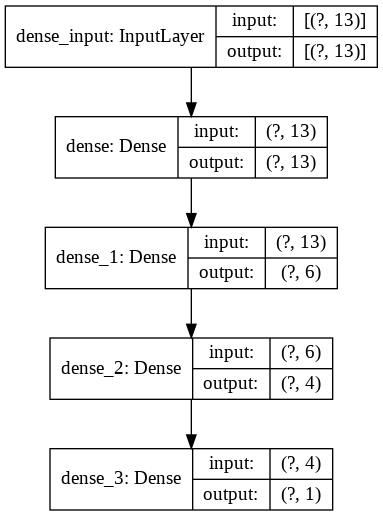

In [10]:
from tensorflow.keras.utils import plot_model

plot_model(modelo, to_file='model.png', show_shapes=True)

## Entrenamiento
---

In [0]:
x_val = x_train[300:, ]
y_val = y_train[300:, ]

In [12]:
# Entrenamiento
modelo.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
13/13 [==============================] - 0s 14ms/step - loss: 587.2164 - mean_absolute_percentage_error: 99.9300 - val_loss: 555.4173 - val_mean_absolute_percentage_error: 99.7955
Epoch 2/5
13/13 [==============================] - 0s 5ms/step - loss: 591.5394 - mean_absolute_percentage_error: 99.6035 - val_loss: 551.1896 - val_mean_absolute_percentage_error: 99.2185
Epoch 3/5
13/13 [==============================] - 0s 4ms/step - loss: 577.3194 - mean_absolute_percentage_error: 98.5667 - val_loss: 536.8781 - val_mean_absolute_percentage_error: 97.2309
Epoch 4/5
13/13 [==============================] - 0s 4ms/step - loss: 555.0121 - mean_absolute_percentage_error: 95.2475 - val_loss: 493.9319 - val_mean_absolute_percentage_error: 90.9831
Epoch 5/5
13/13 [==============================] - 0s 5ms/step - loss: 478.3440 - mean_absolute_percentage_error: 85.3995 - val_loss: 392.8566 - val_mean_absolute_percentage_error: 75.0624


In [13]:
modelo.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))


Epoch 1/100
13/13 [==============================] - 0s 4ms/step - loss: 341.4163 - mean_absolute_percentage_error: 64.5697 - val_loss: 229.5159 - val_mean_absolute_percentage_error: 49.9261
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 178.0035 - mean_absolute_percentage_error: 46.6851 - val_loss: 133.4622 - val_mean_absolute_percentage_error: 48.1869
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 141.5747 - mean_absolute_percentage_error: 53.1410 - val_loss: 137.1125 - val_mean_absolute_percentage_error: 55.0890
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 129.9695 - mean_absolute_percentage_error: 48.4696 - val_loss: 121.2348 - val_mean_absolute_percentage_error: 44.5783
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 122.5277 - mean_absolute_percentage_error: 43.9859 - val_loss: 115.3979 - val_mean_absolute_percentage_error: 44.5863
Epoch 6/100
13/13 [==========================

In [14]:
resultado = modelo.evaluate(x_test, y_test) # Score del modelo
resultado

4/4 [==============================] - 0s 2ms/step - loss: 49.8383 - mean_absolute_percentage_error: 17.7604


[49.838294982910156, 17.760414123535156]

## Visualizar el entrenamiento
---

In [0]:
historia = modelo.fit(x_train, y_train, batch_size=32, epochs=200, validation_data=(x_val, y_val), verbose=0)

In [0]:
import matplotlib.pyplot as plt

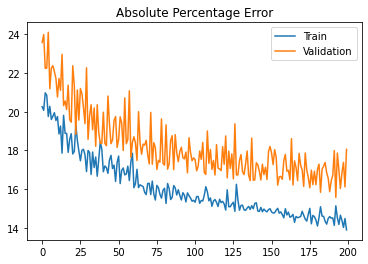

In [24]:
plt.title('Absolute Percentage Error')
plt.plot(historia.history['mean_absolute_percentage_error'], label='Train')
plt.plot(historia.history['val_mean_absolute_percentage_error'], label='Validation')
plt.legend()
plt.show()

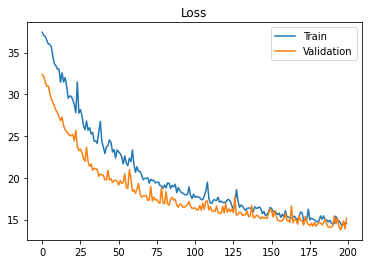

In [25]:
plt.title('Loss')
plt.plot(historia.history['loss'], label='Train')
plt.plot(historia.history['val_loss'], label='Validation')
plt.legend()
plt.show()